# Упражнения по логистической регрессии

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

**Выполните задания, указанные жирным шрифтом.**

## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----

**ЗАДАЧА: Запустите ячейку ниже, чтобы прочитать файл с данными.**

In [186]:
df = pd.read_csv('heart.csv')

In [187]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [188]:
df['target'].unique()

array([1, 0])

### Анализ данных и визуализация данных

Можете дополнительно исследовать данные.

**ЗАДАНИЕ: Посмотрите, есть ли в наборе данных отсутствующие значения, и создайте статистический отчёт о числовых колонках, как показано ниже.**

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [190]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Задачи по визуализации данных

**ЗАДАНИЕ: Нарисуйте график bar plot, показывающий количество точек для каждого значения target.**

<Axes: xlabel='target', ylabel='count'>

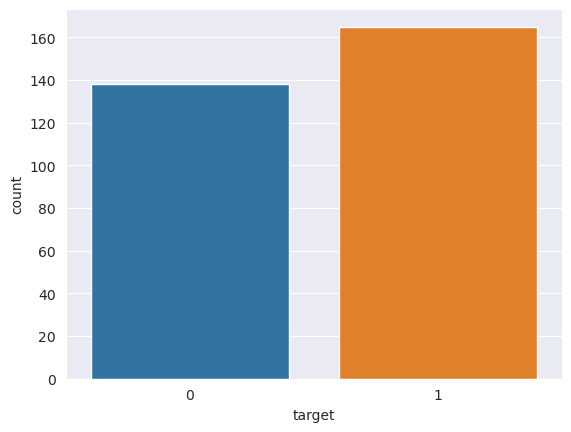

In [191]:
sns.countplot(data=df, x='target')

**ЗАДАНИЕ: Нарисуйте график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

/home/serg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


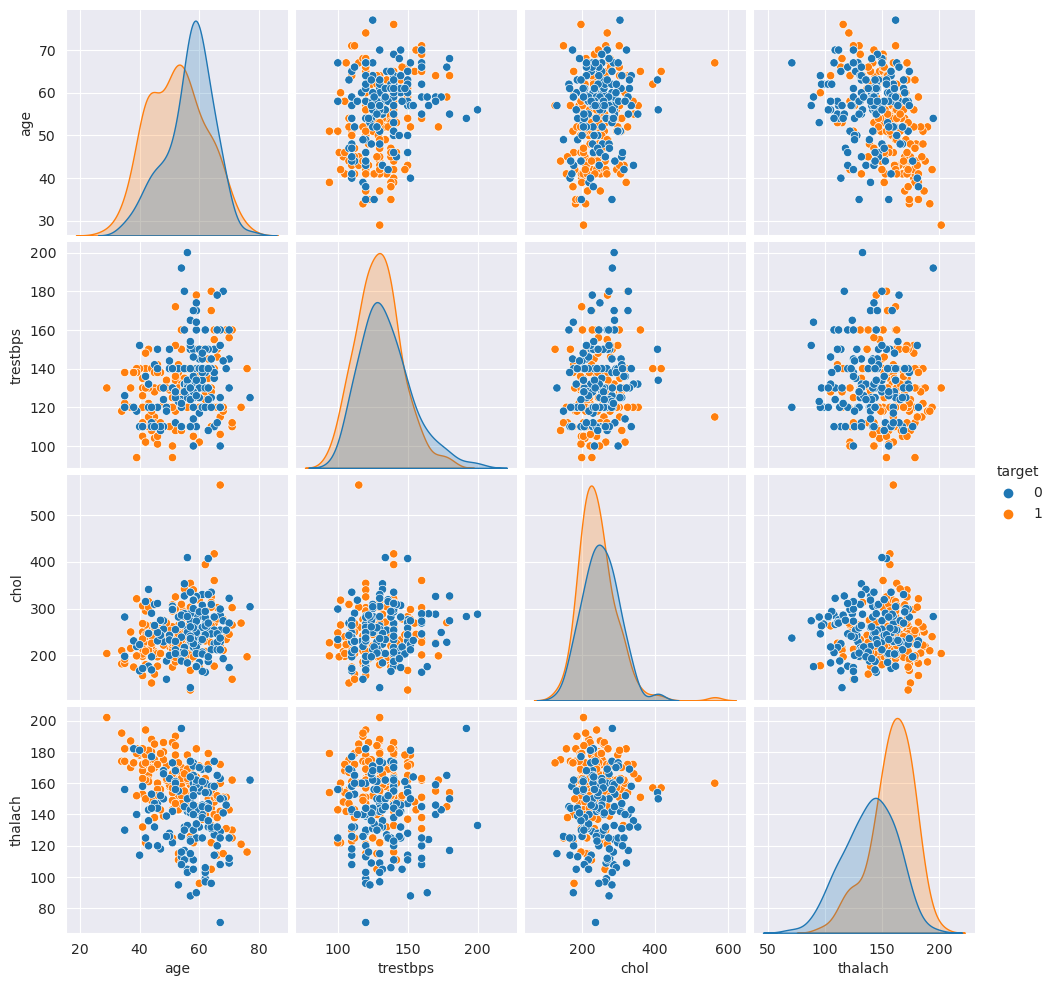

In [192]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target');

**ЗАДАНИЕ: Нарисуйте график heatmap, показывающий корреляции между всеми колонками.**

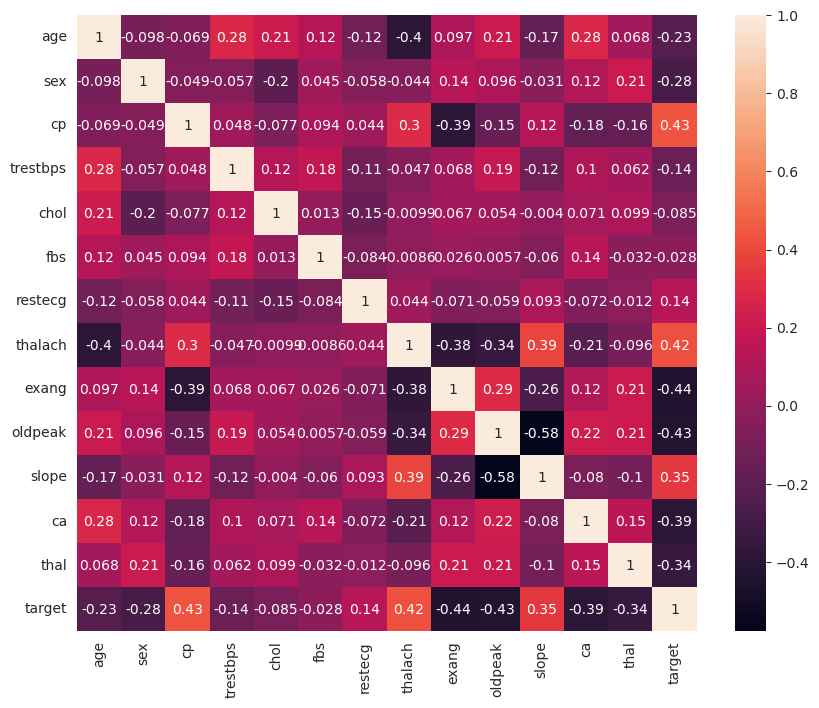

In [193]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**ЗАДАНИЕ: разделите все признаки на 2 объекта, X и y.**

In [194]:
X = df.drop('target', axis=1)
y = df['target']

**ЗАДАНИЕ: разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.1)

**ЗАДАНИЕ: С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler = StandardScaler()

In [199]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**ЗАДАНИЕ: Создайте модель логистической регрессии, и с помощью кросс-валидации найдите хорошее значение значение C. У Вас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Выбор за Вами. В блокноте с решениями мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [201]:
param_grid = {"C": [1, 100, 50, 0.5, 10, 95, 0.1, 0.05, 0.001, 0.002]}
log_model = LogisticRegression(max_iter=1000)
grid_model = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, verbose=2)
log_model_cv = LogisticRegressionCV()

In [202]:
grid_model.fit(scaled_X_train, y_train)
log_model_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ...............................................C=50; total time=   0.0s
[CV] END .......................................

LogisticRegressionCV()

In [203]:
grid_y_pred = grid_model.predict(scaled_X_test)
log_cv_pred = log_model_cv.predict(scaled_X_test)

**ЗАДАНИЕ: Отобразите результаты поиска оптимальных параметров, особенно значение C.** 

*Замечание: Ваше значение может отличаться от найденного нами, поскольку оно зависит от метода поиска.*

In [204]:
grid_model.best_params_

{'C': 0.05}

In [205]:
log_model_cv.C_

array([0.04641589])

### Коэффициенты

**ЗАДАНИЕ: Отобразите коэффициенты модели.**

In [206]:
log_model_cv.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [207]:
grid_model.best_estimator_.coef_

array([[-0.09599819, -0.40598486,  0.5483738 , -0.14245734, -0.09145101,
         0.02594262,  0.082322  ,  0.30397386, -0.33896088, -0.35927944,
         0.25541139, -0.51008948, -0.3824983 ]])

In [208]:
pd.DataFrame(log_model_cv.coef_, columns=(X.columns))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.096212,-0.394602,0.535347,-0.138502,-0.088305,0.024873,0.080838,0.299141,-0.334382,-0.352386,0.25101,-0.497358,-0.374486


In [209]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


**БОНУСНОЕ ЗАДАНИЕ: Мы не показывали это в блокноте лекции, но у Вас есть все навыки, чтобы сделать это! Сделайте визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно можете попробовать выяснить, как отсортировать график! Если что-то будет не получаться, то смело заглядывайте в блокнот с решениями - это можно сделать разными способами, в нашем решении мы используем комбинацию pandas и seaborn.**

In [210]:
coefs = pd.Series(index=X.columns, data=log_model_cv.coef_[0])

In [211]:
coefs = coefs.sort_values()

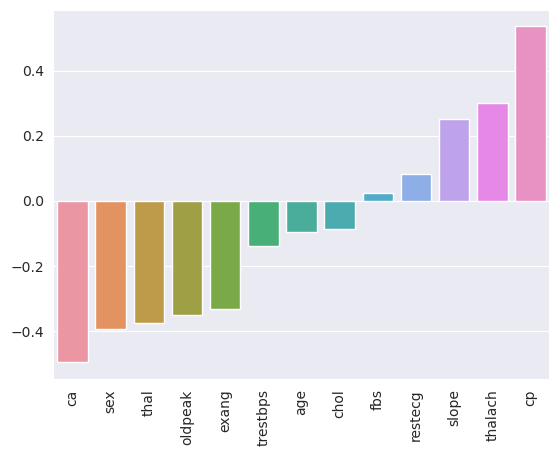

In [212]:
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation=90);



## Оценка модели

**ЗАДАНИЕ: Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [213]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

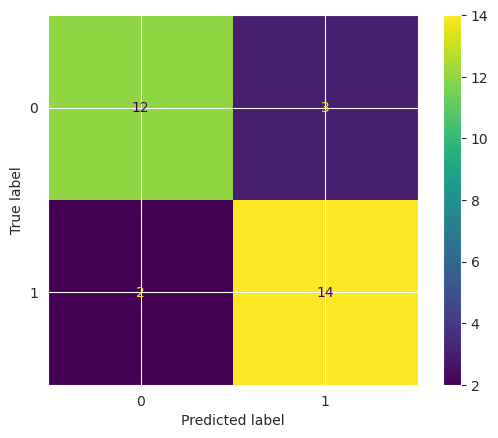

In [214]:
ConfusionMatrixDisplay.from_estimator(log_model_cv, scaled_X_test, y_test);

In [215]:
print(classification_report(y_test, log_model_cv.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


In [216]:
confusion_matrix(y_test, log_model_cv.predict(scaled_X_test))

array([[12,  3],
       [ 2, 14]])

### Кривые производительности

**ЗАДАНИЕ: Нарисуйте графики "precision recall curve" и "ROC Curve".**

In [217]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay

In [218]:
precision_recall_curve(y_test, log_model_cv.predict(scaled_X_test))

(array([0.51612903, 0.82352941, 1.        ]),
 array([1.   , 0.875, 0.   ]),
 array([0, 1]))

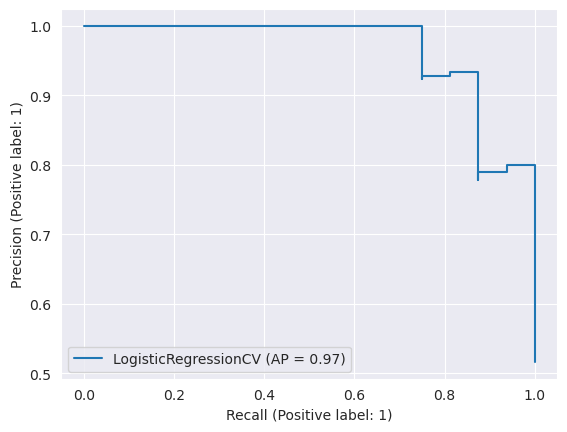

In [219]:
PrecisionRecallDisplay.from_estimator(log_model_cv, scaled_X_test, y_test);

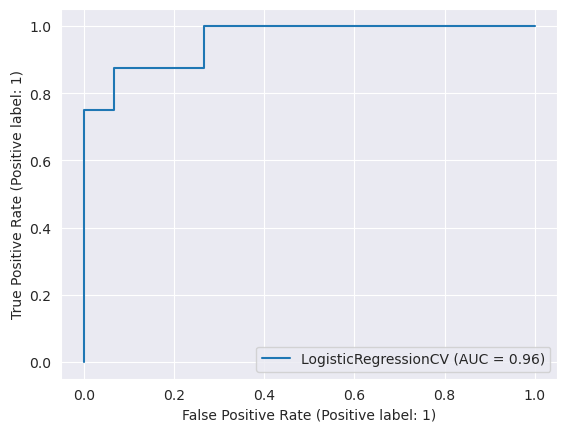

In [220]:
RocCurveDisplay.from_estimator(log_model_cv, scaled_X_test, y_test);

**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**ЗАДАНИЕ: Что предскажет Ваша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

*Для Вашего удобства мы создали массив с указанными выше значениями:*

In [221]:
patient = pd.DataFrame([[54., 1., 0., 122., 286., 0., 0., 116., 1.,
                         3.2, 1., 2., 2.]], columns=X.columns)
patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0


In [222]:
log_model_cv.predict(scaler.transform(patient))

array([0])

In [223]:
log_model_cv.predict_proba(scaler.transform(patient))

array([[0.94751173, 0.05248827]])